# Первичный анализ данных, извлечение пороговых уровней

In [ ]:
import numpy as np
import pandas as pd

# Preprocessing

In [8]:
df_epi = pd.read_excel("./export_EPI_MAIN_weekly_201540_201939_FINAL.xlsx")
df_lab = pd.read_excel("./export_LABD_PCR_weekly_201540_201939_FINAL.xlsx")

In [12]:
df_epi.columns = ["region", "city", "informator", "year", "week", \
                  "orz_0_2",  "orz_3_6", "orz_7_14", "orz_15", "orz_all",\
                  "gripp_0_2", "gripp_3_6", "gripp_7_14", "gripp_15", "gripp_all", \
                  "p_0_2", "p_3_6", "p_7_14", "p_15", "p_all"]
df_lab.columns = ["region", "city", "informator", "year", "week",\
                  "tests_gripp_0_2", "tests_gripp_3_6", "tests_gripp_7_14", "tests_gripp_15", "tests_gripp_all",\
                  "tests_gripp_pos_0_2", "tests_gripp_pos_3_6", "tests_gripp_pos_7_14", "tests_gripp_pos_15",\
                  "tests_gripp_pos_all",\
                  "tests_orz_0_2", "tests_orz_3_6", "tests_orz_7_14", "tests_orz_15", "tests_orz_all",\
                  "tests_orz_pos_0_2", "tests_orz_pos_3_6", "tests_orz_pos_7_14", "tests_orz_pos_15",\
                  "tests_orz_pos_all"]

In [13]:
df_epi["date"] = pd.to_datetime(df_epi["year"].astype(str)+(df_epi['week']-1).astype(str) + "6", format="%Y%U%w")

In [30]:
df_epi = df_epi.reset_index().set_index(["city", "date"])

In [ ]:
cities = df_epi.reset_index().city.unique()

# Смотрим на периоды

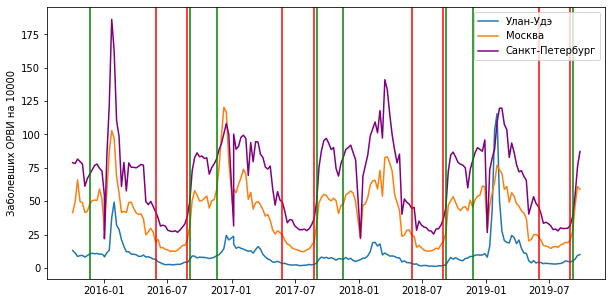

In [258]:
import matplotlib.pyplot as plt

city = "Улан-Удэ"
plt.figure(figsize=(10, 5))
plt.plot(10000 * df_epi.loc[city].orz_all / df_epi.loc[city].p_all, label=city)

city = "Москва"
plt.plot(10000 * df_epi.loc[city].orz_all / df_epi.loc[city].p_all, label=city)

city = "Санкт-Петербург"
plt.plot(10000 * df_epi.loc[city].orz_all / df_epi.loc[city].p_all, c="purple", label=city)
for date in df_epi.loc[city][df_epi.loc[city].week == 22].index:
    plt.axvline(date, c="r")
for date in df_epi.loc[city][df_epi.loc[city].week == 35].index:
    plt.axvline(date, c="r")
for date in df_epi.loc[city][df_epi.loc[city].week == 36].index:
    plt.axvline(date, c="g")
for date in df_epi.loc[city][df_epi.loc[city].week == 47].index:
    plt.axvline(date, c="g")
plt.legend()
plt.ylabel("Заболевших ОРВИ на 10000")
plt.show()

# Извлекаем пороговые значения заболеваемости

In [174]:
def get_describe_data(city, week_from, week_to):
    df_city = df_epi.loc[city]
    mask = (df_city.week <= 35) & (df_city.week >= 22)
    absolute = df_city[mask]["orz_all"].describe()
    proportional = (df_city[mask]["orz_all"] / df_city[mask].p_all).describe()
    
    absolute["city"] = city
    proportional["city"] = city
    absolute["sum"] = df_city[mask]["orz_all"].sum()
    proportional["sum"] = (df_city[mask]["orz_all"] / df_city[mask].p_all).sum()
    
    return absolute, proportional

In [175]:
absolutes, proportionals = [], []
for city in cities:
    absolute, proportional = get_describe_data(city, 22, 35)
    absolutes.append(absolute)
    proportionals.append(proportional)


In [176]:
absolute_df = pd.concat(absolutes, axis=1).transpose().set_index("city")
proportional_df = pd.concat(proportionals, axis=1).transpose().set_index("city")

In [250]:
thresholds.to_csv("threshold.csv")

/Users/anton/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [198]:
pd.set_option('display.max_rows', 62)

In [221]:
thresholds = 10000 * proportional_df["mean"]
thresholds.loc[bar_cities].sort_index() 

city
Барнаул            44.7205
Иркутск             32.066
Калининград        27.3903
Красноярск         20.7706
Москва             16.4985
Санкт-Петербург    32.6418
Ставрополь         28.1013
Улан-Удэ           2.94406
Южно-Сахалинск     31.0553
Name: mean, dtype: object